In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datin=pd.read_csv("C:/Users/pc/Documents/03 Introduction to Time Series in Python/013 IndexE8.csv")

In [3]:
datin.date=pd.to_datetime(datin.date,dayfirst=True)
datin.set_index("date",inplace=True)

In [4]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt

In [5]:
df_comp=datin.copy()
df_comp.index=pd.to_datetime(df_comp.index,dayfirst=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method="ffill")

In [6]:
df_comp['market_value']=df_comp.ftse
df_comp['returns_FTSE']=df_comp.ftse.pct_change(1).mul(100)

In [7]:
from  statsmodels.tsa.arima_model import ARIMA

In [8]:
from scipy.stats.distributions import chi2

In [10]:
#ARIMA(1,1,1)
model_ar_1_i_ma_1=ARIMA(df_comp.returns_FTSE[1:],order=(1,1,1))
result_ar_1_i_ma_1=model_ar_1_i_ma_1.fit()
result_ar_1_i_ma_1.summary()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.returns_FTSE   No. Observations:                 6275
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9601.059
Method:                       css-mle   S.D. of innovations              1.117
Date:                Thu, 10 Sep 2020   AIC                          19210.118
Time:                        23:43:07   BIC                          19237.096
Sample:                    01-11-1994   HQIC                         19219.466
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.314e-07   7.65e-06     -0.109      0.913   -1.58e-05    1.42e-05
ar.L1.D.returns_FTSE    -0.0174      0.013     -1.380      0.167      -0.042       0.007
ma.L1.D.returns_FTSE    -1.0000      0.000  -2265.918      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -57.3961           +0.0000j           57.3961            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

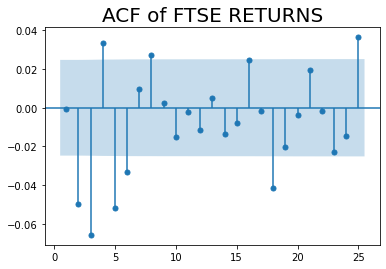

In [13]:
#residuals of the arima(1,1,1)
df_comp['result_ar_1_i_ma_1']=result_ar_1_i_ma_1.resid
sgt.plot_acf(df_comp.result_ar_1_i_ma_1[2:],lags=25,zero=False)
plt.title('ACF of FTSE RETURNS', size=20)
plt.show()

In [14]:
df_comp

,spx,dax,ftse,nikkei,market_value,returns_FTSE,result_ar_1_i_ma_1
date,,,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,3445.980000,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44,3440.580000,-0.156704,NaN
1994-01-11,474.130000,2228.10,3413.770000,18485.25,3413.770000,-0.779229,-0.622524
1994-01-12,474.170000,2182.06,3372.020000,18793.88,3372.020000,-1.222988,-0.760443
1994-01-13,472.470000,2142.37,3360.010000,18577.26,3360.010000,-0.356166,0.355056
...,...,...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,7731.827774,0.212382,0.192145
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,7643.428966,-1.143311,-1.156419
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,7615.839954,-0.360951,-0.397494


In [17]:
#Higher ARIMA Lag Models
model_ar_1_i_ma_2=ARIMA(df_comp.returns_FTSE[1:],order=(1,1,2))
result_ar_1_i_ma_2=model_ar_1_i_ma_2.fit(start_ar_lags=5)
model_ar_1_i_ma_3=ARIMA(df_comp.returns_FTSE[1:],order=(1,1,3))
result_ar_1_i_ma_3=model_ar_1_i_ma_3.fit(start_ar_lags=5)
model_ar_2_i_ma_1=ARIMA(df_comp.returns_FTSE[1:],order=(2,1,1))
result_ar_2_i_ma_1=model_ar_2_i_ma_1.fit()
model_ar_3_i_ma_1=ARIMA(df_comp.returns_FTSE[1:],order=(3,1,1))
result_ar_3_i_ma_1=model_ar_3_i_ma_1.fit()
model_ar_3_i_ma_2=ARIMA(df_comp.returns_FTSE[1:],order=(3,1,2))
result_ar_3_i_ma_2=model_ar_3_i_ma_2.fit(start_ar_lags=5)

C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [18]:
print("ARIMA(1,1,2)= \t LL=",result_ar_1_i_ma_2.llf," \t AIC=",result_ar_1_i_ma_2.aic)
print("ARIMA(1,1,3)= \t LL=",result_ar_1_i_ma_3.llf," \t AIC=",result_ar_1_i_ma_3.aic)
print("ARIMA(2,1,1)= \t LL=",result_ar_2_i_ma_1.llf," \t AIC=",result_ar_2_i_ma_1.aic)
print("ARIMA(3,1,1)= \t LL=",result_ar_3_i_ma_1.llf," \t AIC=",result_ar_3_i_ma_1.aic)
print("ARIMA(3,1,2)= \t LL=",result_ar_3_i_ma_2.llf," \t AIC=",result_ar_3_i_ma_2.aic)

ARIMA(1,1,2)= 	 LL= -9600.440907965234  	 AIC= 19210.88181593047
ARIMA(1,1,3)= 	 LL= -9600.06484135304  	 AIC= 19212.12968270608
ARIMA(2,1,1)= 	 LL= -9593.716247950248  	 AIC= 19197.432495900495
ARIMA(3,1,1)= 	 LL= -9579.613709243677  	 AIC= 19171.227418487353
ARIMA(3,1,2)= 	 LL= -9582.048901851136  	 AIC= 19178.097803702272


In [31]:
def LLR(mod1,mod2,DF=1):
    l1=mod1.fit().llf
    l2=mod2.fit().llf
    LR=(2*(l2-l1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [ ]:
lr=

In [24]:
print("\nLLR test p-value",str(LLR(model_ar_1_i_ma_2,model_ar_1_i_ma_3)))

C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)



LLR test p-value 0.386


C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [25]:
print("\nLLR test p-value",str(LLR(model_ar_1_i_ma_1,model_ar_1_i_ma_2)))


LLR test p-value 0.263


C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [27]:
print("\nLLR test p-value",str(LLR(model_ar_1_i_ma_1,model_ar_1_i_ma_3,DF=2)))


LLR test p-value 0.367


C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


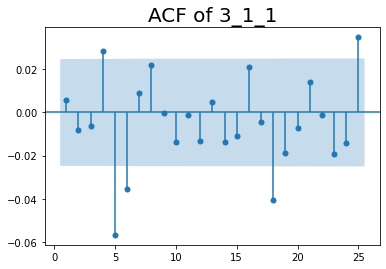

In [28]:
#residuals of the arima(1,1,1)
df_comp['result_ar_3_i_ma_1']=result_ar_3_i_ma_1.resid.iloc[:]
sgt.plot_acf(df_comp.result_ar_3_i_ma_1[2:],lags=25,zero=False)
plt.title('ACF of 3_1_1', size=20)
plt.show()

In [29]:
model_ar_5_i_ma_1=ARIMA(df_comp.returns_FTSE[1:],order=(5,1,1))
result_ar_5_i_ma_1=model_ar_5_i_ma_1.fit()
model_ar_6_i_ma_3=ARIMA(df_comp.returns_FTSE[1:],order=(6,1,3))
result_ar_6_i_ma_3=model_ar_6_i_ma_3.fit()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [30]:
print("ARIMA(5,1,1)= \t LL=",result_ar_5_i_ma_1.llf," \t AIC=",result_ar_5_i_ma_1.aic)
print("ARIMA(6,1,3)= \t LL=",result_ar_6_i_ma_3.llf," \t AIC=",result_ar_6_i_ma_3.aic)
print("ARIMA(3,1,1)= \t LL=",result_ar_3_i_ma_1.llf," \t AIC=",result_ar_3_i_ma_1.aic)

ARIMA(5,1,1)= 	 LL= -9566.853697804778  	 AIC= 19149.707395609556
ARIMA(6,1,3)= 	 LL= -9569.456771892244  	 AIC= 19160.91354378449
ARIMA(3,1,1)= 	 LL= -9579.613709243677  	 AIC= 19171.227418487353


In [35]:
 print("\nLLR test p-value",str(LLR(model_ar_5_i_ma_1,model_ar_6_i_ma_3,DF=3)))


LLR test p-value 1.0


C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [34]:
 print("\nLLR test p-value",str(LLR(model_ar_3_i_ma_1,model_ar_6_i_ma_3,DF=5)))


LLR test p-value 0.001


C:\ana\envs\effyis2\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


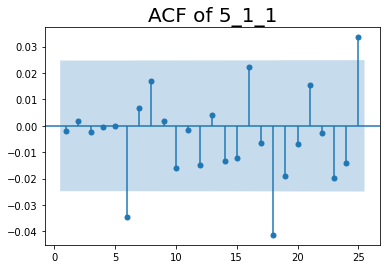

In [37]:
df_comp['result_ar_5_i_ma_1']=result_ar_5_i_ma_1.resid
sgt.plot_acf(df_comp.result_ar_5_i_ma_1[2:],lags=25,zero=False)
plt.title('ACF of 5_1_1', size=20)
plt.show()

In [38]:
#Models of Higher level of Integration
df_comp['delta_prices']=df_comp.market_value.diff(1)

In [40]:
sts.adfuller(df_comp.delta_prices[1:])

(-35.6235682518031,
 0.0,
 5,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68467.67159603653)

In [41]:
df_comp

,spx,dax,ftse,nikkei,market_value,returns_FTSE,result_ar_1_i_ma_1,result_ar_3_i_ma_1,result_ar_5_i_ma_1,delta_prices
date,,,,,,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,3445.980000,NaN,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44,3440.580000,-0.156704,NaN,NaN,NaN,-5.400000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,3413.770000,-0.779229,-0.622524,-0.622524,-0.622524,-26.810000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,3372.020000,-1.222988,-0.760443,-0.748706,-0.745592,-41.750000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,3360.010000,-0.356166,0.355056,0.384598,0.386600,-12.010000
...,...,...,...,...,...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,7731.827774,0.212382,0.192145,0.184762,0.183607,16.386240
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,7643.428966,-1.143311,-1.156419,-1.140331,-1.161839,-88.398808
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,7615.839954,-0.360951,-0.397494,-0.412168,-0.437673,-27.589012


In [43]:
#ARIMAX
model_ar_1_i_ma_1_Xspx=ARIMA(df_comp.market_value,exog=df_comp.spx,order=(1,1,1))
result_ar_1_i_ma_1_Xspx=model_ar_1_i_ma_1_Xspx.fit()
result_ar_1_i_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.384
Method:                       css-mle   S.D. of innovations             58.267
Date:                Fri, 11 Sep 2020   AIC                          68844.768
Time:                        01:48:21   BIC                          68878.490
Sample:                    01-10-1994   HQIC                         68856.452
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4087      1.653     -0.247      0.805      -3.648       2.830
spx                      0.0008      0.001      0.703      0.482      -0.002       0.003
ar.L1.D.market_value     0.8336      0.078     10.737      0.000       0.681       0.986
ma.L1.D.market_value    -0.8683      0.070    -12.401      0.000      -1.006      -0.731
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1996           +0.0000j            1.1996            0.0000
MA.1            1.1517           +0.0000j            1.1517            0.0000
-----------------------------------------------------------------------------
"""

In [45]:
#SARIMAX
from  statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax=SARIMAX(df_comp.market_value,exog=df_comp.spx,order=(1,0,1),seasonal_order=(2,0,1,5))
result_sarimax=model_sarimax.fit()
result_sarimax.summary()

C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ana\envs\effyis2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -33290.268
Date:                           Fri, 11 Sep 2020   AIC                          66594.536
Time:                                   02:29:00   BIC                          66641.749
Sample:                               01-07-1994   HQIC                         66610.895
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5752      0.031     83.360      0.000       2.515       2.636
ar.L1          0.9999      0.000   2462.830      0.000       0.999       1.001
ma.L1         -0.2816      0.008    -34.121      0.000      -0.298      -0.265
ar.S.L5        0.9694      0.005    187.647      0.000       0.959       0.980
ar.S.L10       0.0305      0.003     10.224      0.000       0.025       0.036
ma.S.L5       -0.9998      0.008   -127.856      0.000      -1.015      -0.984
sigma2      2362.1895     28.023     84.296      0.000    2307.266    2417.113
===================================================================================
Ljung-Box (Q):                       92.57   Jarque-Bera (JB):              4504.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""